# Null hypothesis with Chi square

### Author:Nutan Mandale

### Mentor:Vincent Ramdhanie

### Data Description

The dataset consist of the information following
► 577 matches
► 469 Players
► Seasons 2008 to 2016
► Detailed Player Details (Player_DOB, Player_Batting_Style,Player_Bowling_Style, etc...) for 469 players.
► Detailed match events (Toss,Stadium, Date of the match, Who captained the match, who was the keeper, Extras, etc...) for 577 matches.

Here we have an assumption about batting first have no significant effect over winning match
H~0 = Batting first will have no advantage in winning the match
H~1 = Batting first helps in winning the match.

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sqlalchemy import create_engine
%matplotlib inline

The data imported is in Sqlite.Inorder to import the data an engine is created and connected.

In [2]:
engine = create_engine('sqlite:///database.sqlite')

In [3]:
 table_names = engine.table_names() 

In [4]:
print(table_names) 

['Ball_by_Ball', 'Batsman_Scored', 'Batting_Style', 'Bowling_Style', 'City', 'Country', 'Extra_Runs', 'Extra_Type', 'Match', 'Out_Type', 'Outcome', 'Player', 'Player_Match', 'Rolee', 'Season', 'Team', 'Toss_Decision', 'Umpire', 'Venue', 'Wicket_Taken', 'Win_By', 'sqlite_sequence', 'sysdiagrams']


In [5]:
con = engine.connect() 

In [6]:
Match_df = pd.read_sql_query("""SELECT 
 m.Match_Id,
 m.Team_1,
 m.Team_2,
 m.Toss_Winner,
 t3.Team_Name as "Toss_Winner_Name",
 m.Match_Winner,
 t1.Team_Name as 'Match_Winner_Name',
 t2.Team_Name as 'Team1',
 t4.Team_Name as 'Team2',
Toss_Decision.Toss_Name as 'TossName'
FROM
Match m JOIN Team t1 ON m.Match_Winner = t1.Team_Id 
JOIN Team t2 ON m.Team_1 = t2.Team_Id
JOIN Team t3 ON m.Toss_Winner = t3.Team_id
JOIN Team t4 ON m.Team_2 = t4.Team_id
Join Toss_Decision On m.Toss_Decide = Toss_Decision.Toss_Id """, engine)

In [7]:
con.close()

In [8]:
Match_df.head()

,Match_Id,Team_1,Team_2,Toss_Winner,Toss_Winner_Name,Match_Winner,Match_Winner_Name,Team1,Team2,TossName
0,335987,2,1,2,Royal Challengers Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field
1,335988,4,3,3,Chennai Super Kings,3,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat
2,335989,6,5,5,Rajasthan Royals,6,Delhi Daredevils,Delhi Daredevils,Rajasthan Royals,bat
3,335990,7,2,7,Mumbai Indians,2,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat
4,335991,1,8,8,Deccan Chargers,1,Kolkata Knight Riders,Kolkata Knight Riders,Deccan Chargers,bat


In [9]:
Match_df.shape

(574, 10)

In [10]:
Match_df.columns

Index(['Match_Id', 'Team_1', 'Team_2', 'Toss_Winner', 'Toss_Winner_Name',
       'Match_Winner', 'Match_Winner_Name', 'Team1', 'Team2', 'TossName'],
      dtype='object')

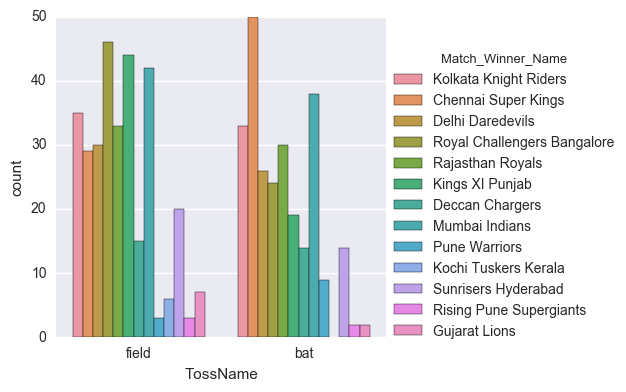

In [11]:
sns.factorplot('TossName',data=Match_df,hue='Match_Winner_Name',kind='count');

In [12]:
bat_df = Match_df[Match_df.TossName == 'bat']
field_df= Match_df[Match_df.TossName == 'field']

In [13]:
bat_df.head()

,Match_Id,Team_1,Team_2,Toss_Winner,Toss_Winner_Name,Match_Winner,Match_Winner_Name,Team1,Team2,TossName
1,335988,4,3,3,Chennai Super Kings,3,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat
2,335989,6,5,5,Rajasthan Royals,6,Delhi Daredevils,Delhi Daredevils,Rajasthan Royals,bat
3,335990,7,2,7,Mumbai Indians,2,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,bat
4,335991,1,8,8,Deccan Chargers,1,Kolkata Knight Riders,Kolkata Knight Riders,Deccan Chargers,bat
5,335992,5,4,4,Kings XI Punjab,5,Rajasthan Royals,Rajasthan Royals,Kings XI Punjab,bat


In [14]:
field_df.head()

,Match_Id,Team_1,Team_2,Toss_Winner,Toss_Winner_Name,Match_Winner,Match_Winner_Name,Team1,Team2,TossName
0,335987,2,1,2,Royal Challengers Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field
7,335994,3,7,7,Mumbai Indians,3,Chennai Super Kings,Chennai Super Kings,Mumbai Indians,field
8,335995,8,5,5,Rajasthan Royals,5,Rajasthan Royals,Deccan Chargers,Rajasthan Royals,field
9,335996,4,7,7,Mumbai Indians,4,Kings XI Punjab,Kings XI Punjab,Mumbai Indians,field
10,335997,2,5,5,Rajasthan Royals,5,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,field


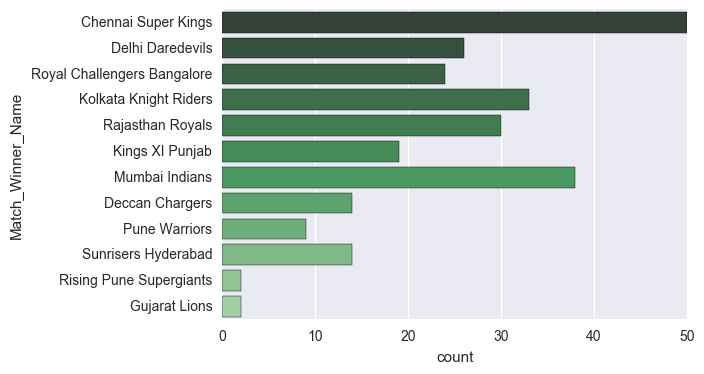

In [15]:
sns.countplot(y="Match_Winner_Name", data=bat_df, palette="Greens_d");

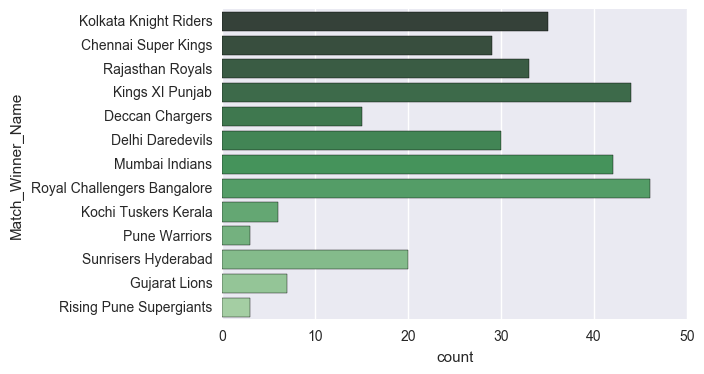

In [16]:
sns.countplot(y="Match_Winner_Name", data=field_df, palette="Greens_d");

In [21]:
bat_first = Match_df[((Match_df['TossName'] == 'bat') & (Match_df['Toss_Winner_Name'] == Match_df['Match_Winner_Name'])) | ((Match_df['TossName'] == 'field') & (Match_df['Toss_Winner_Name'] != Match_df['Match_Winner_Name']))]

In [22]:
bat_first.head()

,Match_Id,Team_1,Team_2,Toss_Winner,Toss_Winner_Name,Match_Winner,Match_Winner_Name,Team1,Team2,TossName
0,335987,2,1,2,Royal Challengers Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,field
1,335988,4,3,3,Chennai Super Kings,3,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat
7,335994,3,7,7,Mumbai Indians,3,Chennai Super Kings,Chennai Super Kings,Mumbai Indians,field
9,335996,4,7,7,Mumbai Indians,4,Kings XI Punjab,Kings XI Punjab,Mumbai Indians,field
14,336001,2,3,3,Chennai Super Kings,3,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat


In [26]:
# Table of counts
counttable = pd.crosstab(bat_first['Match_Winner_Name'], bat_first['TossName'])
print(counttable)


TossName                     bat  field
Match_Winner_Name                      
Chennai Super Kings           29     16
Deccan Chargers               11      7
Delhi Daredevils               8     10
Gujarat Lions                  0      1
Kings XI Punjab                5     23
Kochi Tuskers Kerala           0      2
Kolkata Knight Riders         15     12
Mumbai Indians                21     22
Pune Warriors                  3      3
Rajasthan Royals              13     12
Royal Challengers Bangalore    7     20
Sunrisers Hyderabad            6     12


In [27]:
print(stats.chisquare(counttable, axis=None))


Power_divergenceResult(statistic=136.7906976744186, pvalue=3.6274962306503136e-18)


Here we see the p value is significantly less than 0.05. Hence our null hypothesis of batting first will have no advantage in winning the match is wrong.
Batting first surely helps in winning the match.